**Лабораторная работа №5**

**Задание:**

1) реализовать 3 генератора данных на плоскости или в пространстве (равномерное, Гаусс.распр, ... и др)

2) написать реализацию метода Парзена-Розенблатта

3) восстановить плотность в виде картинки

4) для 1 из 3 наборов данных (п.1) применить оптимизацию ширины окна м. LOO

5) для сгенерированных данных с 2-мя и более горбами применить EM-алгоритм из sckit-learn

Импортируем библиотеки

In [1]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

**1. Создадим генератор**

Равномерное распределение

In [2]:
#f*(b-a) = (x-a)
#f*(b-a) + a = x
def linear(a=0, b=1):
    '''
    Линейное распределение
    a - начало отрезка
    b - конец отрезка
    выводит случайное число в этом распределении
    '''
    return random.random() * (b-a)+a

def LinearData(n):
    x = []
    for i in range (n):
        x.append(linear())
    return x

LinearData(10)

[0.7638301855750236,
 0.6557637229661366,
 0.7799903141355019,
 0.7294260625687105,
 0.9085433017948317,
 0.20923475375117073,
 0.6792885121808163,
 0.2647273763240433,
 0.2570647505728275,
 0.24865497537872627]

Гауссовское (нормальное) распределене

In [3]:
# (12/n)**(1/2) (чтобы выровнять дисперсию) * (x - n/2 (чтобы выровнять мат ожидание)) 
def gauss(m=0, d=1):
    '''
    Гауссовское распределение
    m - мат ожидание
    d - дисперсия
    выводит случайное число в этом распределении
    '''
    n = 12
    x = 0
    for i in range (n):
         x = x + random.random()
    return d * (12/n)**(1/2) * (x - n/2) + m

def GaussData(n):
    x = []
    for i in range (n):
        x.append(gauss())
    return x

GaussData(10)

[-1.2819404558597212,
 0.6017344811562362,
 -1.6997302245191364,
 0.7199402296782242,
 -2.3461150521470473,
 -0.09950898425379684,
 1.686523386292838,
 0.9490995454923157,
 -0.7222385934771447,
 -1.158420292412826]

Два пика

In [4]:
def TwoPeaksData(N,m1=-4,d1=2,m2=3,d2=6):
    x = []
    for i in range(N):
        r = linear()
        if r > 0.5:
            x.append(gauss(m1,d1))
        else:
            x.append(gauss(m2,d2))
    return x

TwoPeaksData(10)

[-0.7968203360281425,
 -4.3920065906421595,
 -9.04749253443876,
 -5.403082305589994,
 -6.576111976312696,
 -3.7882542259516168,
 -4.140022369542569,
 2.799632508150724,
 -3.8037187137226844,
 8.800371428908612]

**2. Модель Парзена-Розенблатта**

In [5]:
def gauss_kernel(r): # единственный рабочий без условий (с точностью 0.961)
     return ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (r**2))
    
def ParzRozen(x, data, h):
    '''
    Эмпирическая Оценка Парзена-Розенблатта по окну ширины h
    '''
    rez = 0
    for i in data:
        rez = rez + gauss_kernel((x - i)/h)
    return rez / (len(data)*h)

**3. Восстановим плотность в картинках**

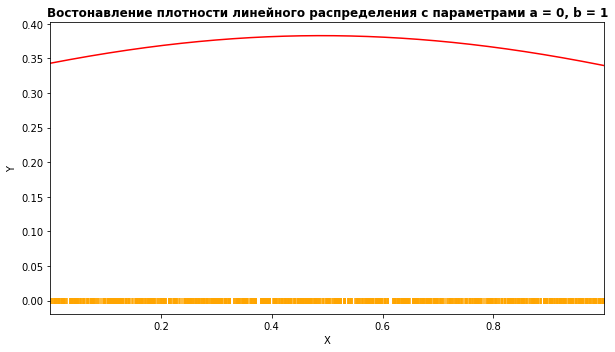

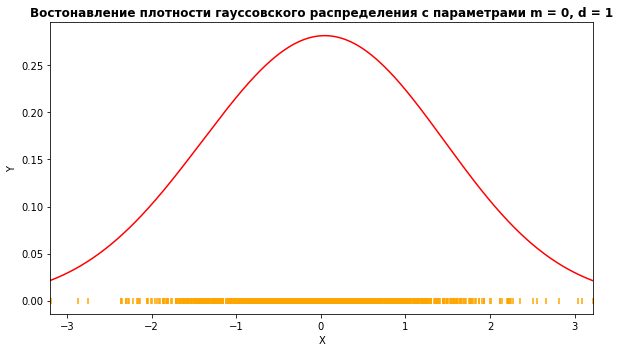

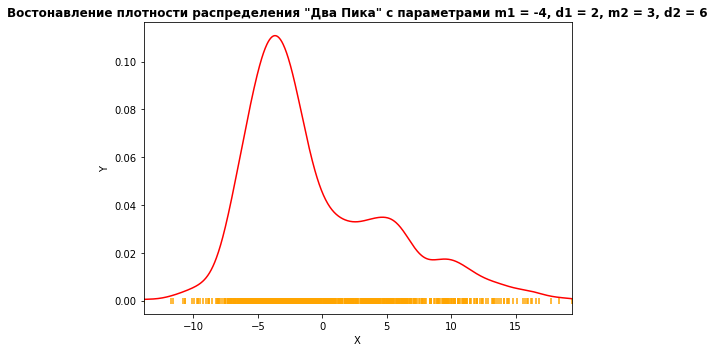

In [10]:
grid_points = 1000
# Изобразим график 1
lin_dat = LinearData(grid_points)
ld_min = min(lin_dat)
ld_max = max(lin_dat)
x = np.linspace(ld_min, ld_max, grid_points)

points = np.zeros((1000))

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, lin_dat, h=1), color = 'red')
ax.scatter(lin_dat,points, marker = "|", color = 'orange')

# Оформление
ax.set_xlim((ld_min, ld_max))
ax.set_title('Востонавление плотности линейного распределения с параметрами a = 0, b = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 2
gau_dat = GaussData(grid_points)
gau_min = min(gau_dat)
gau_max = max(gau_dat)
x = np.linspace(gau_min, gau_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, gau_dat, h=1), color = 'red')
ax.scatter(gau_dat,points, marker = "|", color = 'orange')


# Оформление
ax.set_xlim((gau_min, gau_max))
ax.set_title('Востонавление плотности гауссовского распределения с параметрами m = 0, d = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 3
tp_dat = TwoPeaksData(grid_points)
tp_min = min(tp_dat)
tp_max = max(tp_dat)
x = np.linspace(tp_min, tp_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=1), color = 'red')
ax.scatter(tp_dat,points, marker = "|", color = 'orange')

# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = -4, d1 = 2, m2 = 3, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

**4. Оптимизация ширины окна одного из наборов методом Leave One Out**

In [11]:
#переберем циклом for наименьшее loo (от 0 до 10)
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(ParzRozen(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(tp_dat,h) < loo_min:
        loo_min = LeaveOneOut(lin_dat,h)
        h_min = h
print(f"LOO при стартовом значении h=10: {LeaveOneOut(tp_dat,h)}")

LOO при стартовом значении h=10: 3471.7834041606134


Построим и выведем график

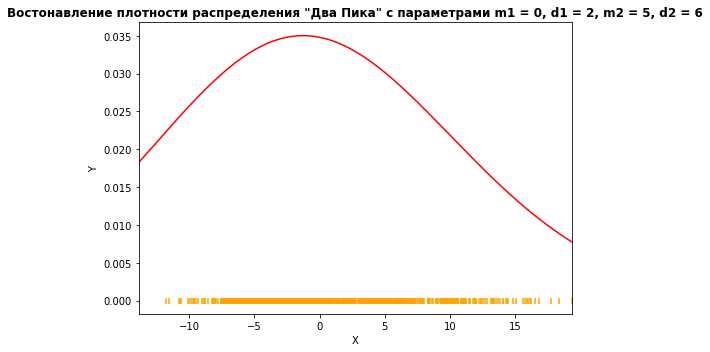

In [12]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=10), color = 'red')
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|", color = 'orange')


# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

In [13]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 501.26615034792076


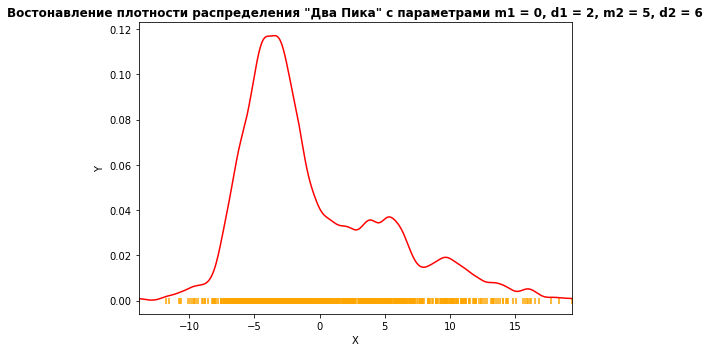

In [14]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=h_min), color = 'red')
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|", color = 'orange')

# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

**5. Два пика - алгоритм из SCIKIT-LEARN**

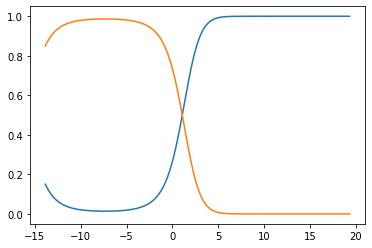

In [18]:
from sklearn.mixture import GaussianMixture
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0], x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1])
plt.show()